データ可視化を行うノートブック

In [5]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import japanize_matplotlib
%matplotlib inline

In [6]:
df_train = pd.read_csv('./data/train.csv')
df_train.head()

,essay_id,full_text,score
0,000d118,Many people have car where they live. The thin...,3
1,000fe60,I am a scientist at NASA that is discussing th...,3
2,001ab80,People always wish they had the same technolog...,4
3,001bdc0,"We all heard about Venus, the planet without a...",4
4,002ba53,"Dear, State Senator\n\nThis is a letter to arg...",3


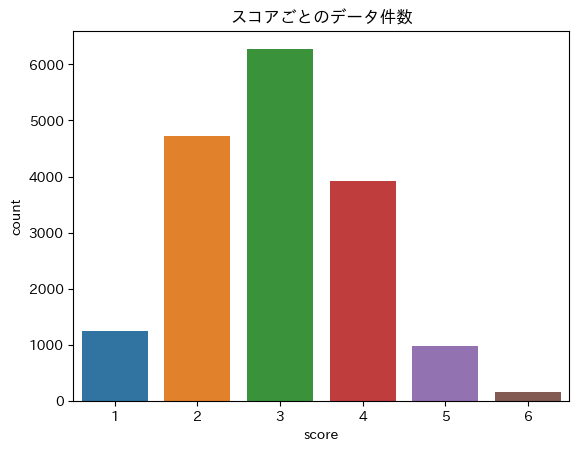

In [23]:
fig,ax = plt.subplots()
sns.countplot(x='score',data=df_train,ax=ax)
ax.set_title('スコアごとのデータ件数')
plt.show()

In [24]:
df_train['text_len'] = df_train.full_text.str.len()
df_train.head()

,essay_id,full_text,score,text_len
0,000d118,Many people have car where they live. The thin...,3,2677
1,000fe60,I am a scientist at NASA that is discussing th...,3,1669
2,001ab80,People always wish they had the same technolog...,4,3077
3,001bdc0,"We all heard about Venus, the planet without a...",4,2701
4,002ba53,"Dear, State Senator\n\nThis is a letter to arg...",3,2208


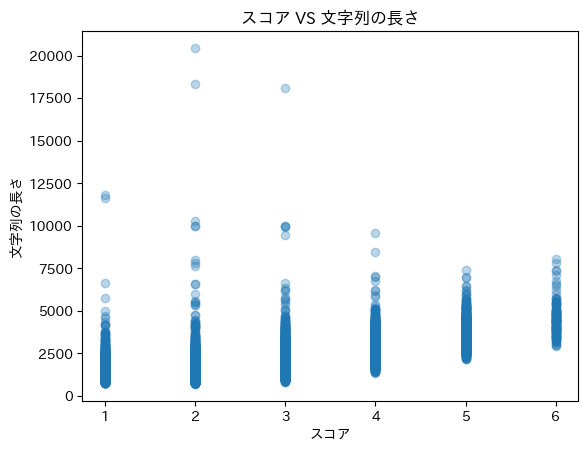

In [32]:
#文章が長いほどスコアが高いのではないか
fig,ax = plt.subplots()
ax.scatter(df_train.score,df_train.text_len,alpha=0.3)
ax.set_xlabel('スコア')
ax.set_ylabel('文字列の長さ')
ax.set_title('スコア VS 文字列の長さ')
plt.show()

・文字列と長さは無相関に見える

In [27]:
df_train['space_count'] = df_train.full_text.str.count(' ')
df_train['word_len_avg'] = (df_train.text_len - df_train.space_count) / (df_train.space_count + 1)
df_train.head()

,essay_id,full_text,score,text_len,space_count,word_len_avg
0,000d118,Many people have car where they live. The thin...,3,2677,496,4.388330
1,000fe60,I am a scientist at NASA that is discussing th...,3,1669,327,4.091463
2,001ab80,People always wish they had the same technolog...,4,3077,555,4.535971
3,001bdc0,"We all heard about Venus, the planet without a...",4,2701,446,5.044743
4,002ba53,"Dear, State Senator\n\nThis is a letter to arg...",3,2208,380,4.797900


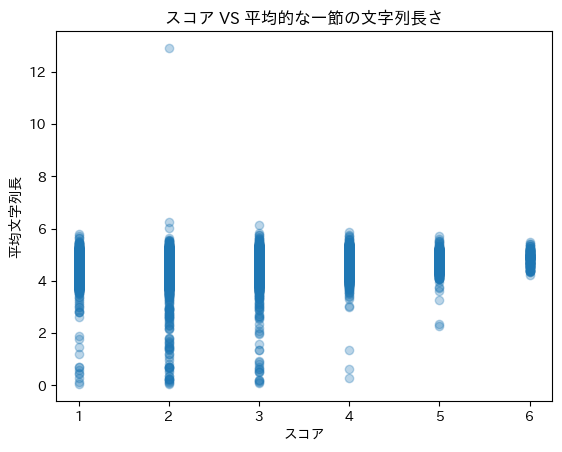

In [33]:
#一節が長めだとスコアが高いのではないか？
fig, ax = plt.subplots()
ax.scatter(df_train.score,df_train.word_len_avg,alpha=0.3)
ax.set_title('スコア VS 平均的な一節の文字列長さ')
ax.set_xlabel('スコア')
ax.set_ylabel('平均文字列長')
plt.show()

In [29]:
#「I」で始まる小論文は自分が足りでスコアが低いのではないか
df_train['I-cnt'] = df_train.full_text.str.startswith('I') + df_train.full_text.str.count('. I ')
df_train.head()

,essay_id,full_text,score,text_len,space_count,word_len_avg,I-cnt
0,000d118,Many people have car where they live. The thin...,3,2677,496,4.388330,1
1,000fe60,I am a scientist at NASA that is discussing th...,3,1669,327,4.091463,2
2,001ab80,People always wish they had the same technolog...,4,3077,555,4.535971,0
3,001bdc0,"We all heard about Venus, the planet without a...",4,2701,446,5.044743,0
4,002ba53,"Dear, State Senator\n\nThis is a letter to arg...",3,2208,380,4.797900,2


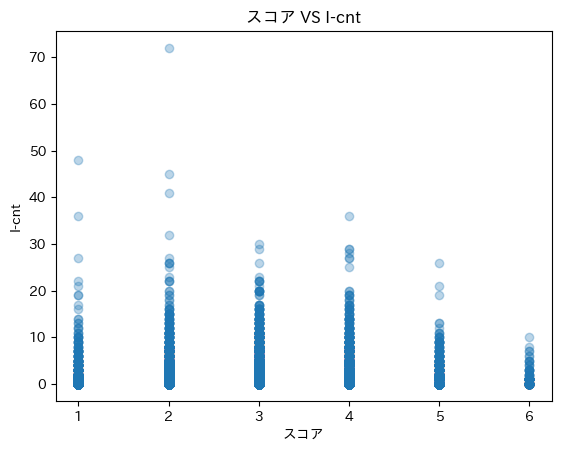

In [37]:
fig,ax = plt.subplots()
ax.scatter(df_train.score,df_train['I-cnt'],alpha=0.3)
ax.set_title('スコア VS I-cnt')
ax.set_xlabel('スコア')
ax.set_ylabel('I-cnt')
plt.show()